In [ ]:
#importing required librabries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style="whitegrid")

In [ ]:
#loading dataset
jobdata = pd.read_csv('/content/drive/MyDrive/fake_job_postings.csv')

**Data Visualization**

In [ ]:
jobdata.head()

In [ ]:
jobdata.shape

(17880, 18)

In [ ]:
jobdata.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
jobdata.info()

In [ ]:
jobdata.describe()

In [ ]:
#Count Plot of fraudulent job
sb.countplot(x='fraudulent', data=jobdata)

jobdata.value_counts('fraudulent')
# 0 - real job
# 1 - fake job

In [ ]:
# Check if there is any null value
jobdata.isna().apply(pd.value_counts)

In [ ]:
#checking the number of job posted by function
jobdata.value_counts('function')[:10]

In [ ]:
plt.figure(figsize=(40,10))
sb.countplot(x='function', hue='fraudulent', data=jobdata)
plt.title('No. of Jobs Function wise', size=20)
plt.xlabel('Function', size=10)
plt.ylabel('Jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#checking the number of job posted by Industry
jobdata.value_counts(('industry'))[:40]

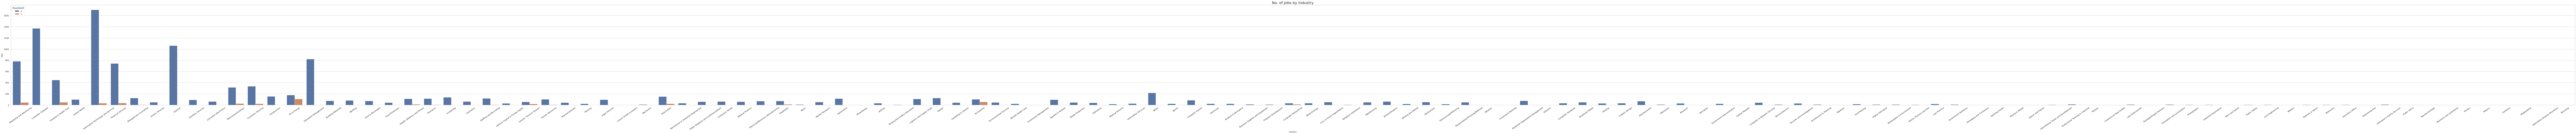

In [ ]:
plt.figure(figsize=(250,10))
sb.countplot(x='industry', hue='fraudulent', data=jobdata)
plt.title('No. of Jobs by Industry', size=20)
plt.xlabel('Industry', size=10)
plt.ylabel('Jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [ ]:
#Further evaluating Jobs posting Categories
plt.figure(figsize=(60,25))
sb.set_style("darkgrid")

plt.subplot(3,3,1)
sb.countplot(x='required_education',data=jobdata,palette='Set1')
plt.xticks(rotation=60)

plt.subplot(3,3,2)
sb.countplot(x='required_experience',data=jobdata,palette='Set1')

plt.subplot(3,3,3)
sb.countplot(x='employment_type',data=jobdata,palette='Set1')

In [ ]:
correlation=jobdata.corr()

#constructing a Heat Map
plt.figure(figsize= (10,10))
sb.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
#color dark- positive correlated
#color light- negative correlated
#correlation matrix tells which matrix are important and which are not

In [ ]:
#Further evaluating Jobs posting Categories
plt.figure(figsize=(30,25))
sb.set_style("darkgrid")

plt.subplot(3,3,1)
sb.countplot(x='telecommuting',data=jobdata,palette='Set2')

plt.subplot(3,3,2)
sb.countplot(x='has_company_logo',data=jobdata,palette='Set2')

plt.subplot(3,3,3)
sb.countplot(x='has_questions',data=jobdata,palette='Set2')

In [ ]:
#checking the number of job posted by Title
jobdata.value_counts('title')

In [ ]:
Title=dict(jobdata.value_counts('title')[:10])

In [ ]:
plt.figure(figsize=(30,6))
plt.bar(Title.keys(), Title.values())
plt.title('Job posted based on Title', size=20)
plt.xlabel('Job title', size=10)
plt.ylabel('Count', size=10)
plt.xticks(rotation=70)
plt.show()

In [ ]:
#number of job posted location wise
jobdata.value_counts('location')

In [ ]:
Location=dict(jobdata.value_counts('location')[:15])

In [ ]:
plt.figure(figsize=(30,6))
plt.bar(Location.keys(), Location.values())
plt.title('Job posted based by location', size=20)
plt.xlabel('Locations', size=10)
plt.ylabel('Count', size=10)
plt.xticks(rotation=70)
plt.show()

In [ ]:
#number of job posted department wise
jobdata.value_counts('department')

In [ ]:
Dept=dict(jobdata.value_counts('department')[:15])

In [ ]:
plt.figure(figsize=(30,6))
plt.bar(Dept.keys(), Dept.values())
plt.title('Job posted based by Department', size=20)
plt.xlabel('Department', size=10)
plt.ylabel('Count', size=10)
plt.xticks(rotation=70)
plt.show()

In [ ]:
jobdata.company_profile.values

In [ ]:
jobdata.requirements.values

In [ ]:
jobdata.benefits.values

In [ ]:
jobdata.description.values

        Features like company_profile, description, requirements and benefits are complete text- Textual Datasets

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

**Data PreProcessing**

In [ ]:
#Checking for missing values
jobdata.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
#handling missing values-replacing the categorical features with the most appeared values

jobdata.function.fillna(value = "Information Technology", inplace=True)

In [ ]:
jobdata.industry.fillna(value = "Information Technology and Services", inplace=True)

jobdata.required_education.fillna(value = "Bachelor's Degree", inplace=True)

jobdata.required_experience.fillna(value = "Mid-Senior level", inplace=True)

jobdata.employment_type.fillna(value = "Full-time", inplace=True)

jobdata.title.fillna(value = "English Teacher Abroad", inplace=True)

In [ ]:
jobdata.location.fillna(value = "GB, LND, London ", inplace=True)

In [ ]:
#removed the irrelevent and the features which holds more than 60% missing values
del jobdata['department']
del jobdata['salary_range']
del jobdata['job_id']
#del jobdata['location']

#removing the textual datasets too
del jobdata['company_profile']
del jobdata['description']
del jobdata['requirements']
del jobdata['benefits']


#removing telecommuting features too as it has no corelation
#jobdata.drop(['telecommuting'],axis=1,inplace=True)

In [ ]:
#Checking for missing values
jobdata.isnull().sum()

title                  0
location               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
#Check if any duplicate rows in dataset
jobdata.duplicated().sum()

773

In [ ]:
#drop the duplicate values
jobdata.drop_duplicates(inplace=True)

In [ ]:
jobdata.duplicated().sum()

0

Q1: What are the job titles have most full time job opportunities and how many?

In [ ]:
#Subsetting dataframe which have 'Full-time' emplyment type and also are not fruad.
jobdata_jobs = jobdata[(jobdata['employment_type'] == 'Full-time') & (jobdata['fraudulent']== 0)]

In [ ]:
jobdata_jobs.shape

(13716, 10)

In [ ]:
#Checking the counts of each unique value
jobdata_jobs['title'].value_counts()

In [ ]:
jobdata_jobs['title'].value_counts().max()

118

              Ans : Job title 'Customer Service Associate ' has 118 opportunities for a full time job

Q2 : Which industry have the maximum number of fake job postings?

In [ ]:
#Only including rows which are fake job postings.
jobdata_industry = jobdata[jobdata['fraudulent']== 1]

In [ ]:
jobdata_industry.shape

In [ ]:
#Checking each unique value counts of industry.
jobdata_industry['industry'].value_counts()

                Ans: Industry with, maximum no. of fake job postings : Information Technology and Services

In [ ]:
#converting categorical features to numeric
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
jobdata['title'] = le.fit_transform(jobdata['title'])
jobdata['location'] = le.fit_transform(jobdata['location'])
jobdata['employment_type'] = le.fit_transform(jobdata['employment_type'])
jobdata['required_experience'] = le.fit_transform(jobdata['required_experience'])
jobdata['required_education'] = le.fit_transform(jobdata['required_education'])
jobdata['industry'] = le.fit_transform(jobdata['industry'])
jobdata['function'] = le.fit_transform(jobdata['function'])

In [ ]:
jobdata.head()

,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6043,2535,0,1,0,2,4,1,58,22,0
1,2183,1073,0,1,0,1,6,1,75,7,0
2,1763,1867,0,1,0,1,5,1,58,18,0
3,299,1703,0,1,0,1,5,1,22,31,0
4,975,1741,0,1,1,1,5,1,51,16,0


In [ ]:
jobdata.shape

(17107, 11)

In [ ]:
fraud = jobdata[jobdata['fraudulent']== 1]
not_fraud = jobdata[jobdata['fraudulent']== 0]

In [ ]:
fraud.shape, not_fraud.shape

((819, 11), (16288, 11))

        The dataset is highly imbalanced

In [ ]:
#seperating feature and target
X=jobdata[['has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'telecommuting', 'required_education', 'industry', 'function', 'title', 'location']].values
Y=jobdata[['fraudulent']].values

In [ ]:
#balancing dataset
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
#implementing oversampling for handling imbalanced

smt = SMOTETomek(random_state=42)
X_res,y_res=smt.fit_resample(X,Y)

In [ ]:
X_res.shape, y_res.shape

((31982, 10), (31982,))

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [ ]:
scalar.fit(X_res)

StandardScaler()

In [ ]:
X_fin= scalar.transform(X_res)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold (n_splits = 10)
kf


KFold(n_splits=10, random_state=None, shuffle=False)

In [ ]:
def getScore(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
scores_lgr = []
scores_rf = []
scores_knn = []
scores_dtr = []
scores_svc = []
for train_index, test_index in kf.split(X_fin, y_res):
  X1_train, X1_test, y1_train, y1_test = X_fin[train_index], X_fin[test_index], y_res[train_index], y_res[test_index]

  scores_lgr.append(getScore(LogisticRegression(), X1_train, X1_test, y1_train, y1_test))
  scores_rf.append(getScore(RandomForestClassifier(), X1_train, X1_test, y1_train, y1_test))
  scores_knn.append(getScore(KNeighborsClassifier(), X1_train, X1_test, y1_train, y1_test))
  scores_dtr.append(getScore(DecisionTreeClassifier(), X1_train, X1_test, y1_train, y1_test))
  scores_svc.append(getScore(SVC(), X1_train, X1_test, y1_train, y1_test))


In [ ]:
from sklearn.model_selection import cross_val_score


Random Forest

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=50), X_fin, y_res, cv=20, scoring = 'accuracy').mean()

0.9813357762664167

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=30), X_fin, y_res, cv=20, scoring = 'precision').mean()

0.9762765808715536

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=30), X_fin, y_res, cv=20, scoring = 'recall').mean()

0.9861846057571965

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=30), X_fin, y_res, cv=20, scoring = 'f1').mean()

0.9807989811220492

In [ ]:
scores_rf

[0.946343256155825,
 0.9423006247703051,
 0.948180815876516,
 0.9588386622565234,
 0.9595736861447997,
 0.9724366041896362,
 0.9875045938993017,
 0.9838294744579199,
 0.9834619625137817,
 0.9827269386255053]

In [ ]:
np.array(scores_rf).mean()

0.9665196618890114

KNN

In [ ]:
cross_val_score(KNeighborsClassifier(), X_fin, y_res, cv=20, scoring = 'accuracy').mean()

0.9519434021263289

In [ ]:
cross_val_score(KNeighborsClassifier(), X_fin, y_res, cv=20, scoring = 'precision').mean()

0.9270238489612556

In [ ]:
cross_val_score(KNeighborsClassifier(), X_fin, y_res, cv=20, scoring = 'recall').mean()

0.981304755944931

In [ ]:
cross_val_score(KNeighborsClassifier(), X_fin, y_res, cv=20, scoring = 'f1').mean()

0.9531939167864918

Decision Tree

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini'), X_fin, y_res, cv=20, scoring = 'accuracy').mean()

0.9670156152282676

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini'), X_fin, y_res, cv=20, scoring = 'precision').mean()

0.9592493293227708

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini'), X_fin, y_res, cv=20, scoring = 'recall').mean()

0.9764299123904883

In [ ]:
cross_val_score(DecisionTreeClassifier(criterion='gini'), X_fin, y_res, cv=15, scoring = 'f1').mean()

0.9654129564186322

Logistic Regression

In [ ]:
cross_val_score(LogisticRegression(), X_fin, y_res, cv=20, scoring = 'accuracy').mean()

0.8379432457786116

In [ ]:
cross_val_score(LogisticRegression(), X_fin, y_res, cv=20, scoring = 'precision').mean()

0.8368618712159467

In [ ]:
cross_val_score(LogisticRegression(), X_fin, y_res, cv=20, scoring = 'recall').mean()

0.8537343554443055

In [ ]:
cross_val_score(LogisticRegression(), X_fin, y_res, cv=10, scoring = 'f1').mean()

0.8452142394770983

SVM

In [ ]:
cross_val_score(SVC(), X_fin, y_res, cv=20, scoring = 'accuracy').mean()

0.9019163344277674

In [ ]:
cross_val_score(SVC(), X_fin, y_res, cv=10, scoring = 'precision').mean()

0.8768814831939211

In [ ]:
cross_val_score(SVC(), X_fin, y_res, cv=10, scoring = 'recall').mean()

0.9163517309936464

In [ ]:
cross_val_score(SVC(), X_fin, y_res, cv=10, scoring = 'f1').mean()

0.8960709169021556

In [ ]:
'''
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
tree = tree.DecisionTreeClassifier()/*

accuracy = []

  tree.fit(X1_train, y1_train)
  prediction = tree.predict(X1_test)
  score= accuracy_score(prediction, y1_test)
  accuracy.append(score)

print(accuracy)